## Inference 2 - Correlation analysis of AQI values and number of deaths

In [443]:
import pandas as pd
import numpy as np
import collections
import csv
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [444]:
# Reading CSV files
df = pd.read_csv('/Users/harikabandarupally/Desktop/SBU/Spring22/CSE 544/Project/MandatoryDB/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
aqi1 = pd.read_csv('/Users/harikabandarupally/Desktop/SBU/Spring22/CSE 544/Project/ExploratoryDB/daily_aqi_by_county_2020.csv')
aqi2 = pd.read_csv('/Users/harikabandarupally/Desktop/SBU/Spring22/CSE 544/Project/ExploratoryDB/daily_aqi_by_county_2021.csv')

In [445]:
print(len(aqi1),len(aqi2))

338195 218196


In [590]:
# Dataframe containing data pertaining to cases and deaths during Covid
df.head()

,Date,State Name,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
31740,2021-01-01,AK,46241,NaN,NaN,470,0.0,285,NaN,NaN,4,0.0,01/01/2021 12:00:00 AM,NaN,NaN
29287,2022-01-01,AK,151583,NaN,NaN,0,0.0,947,NaN,NaN,0,0.0,01/03/2022 01:55:55 PM,NaN,NaN
19986,2021-01-02,AK,46530,NaN,NaN,289,0.0,287,NaN,NaN,2,0.0,01/02/2021 12:00:00 AM,NaN,NaN
20302,2022-01-02,AK,151583,NaN,NaN,0,0.0,947,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
31873,2021-01-03,AK,46698,NaN,NaN,168,0.0,289,NaN,NaN,2,0.0,01/03/2021 12:00:00 AM,NaN,NaN


## Data Pre-processing

In [448]:
# Finding if nulls are present 
df['new_death'].isnull().sum()

0

In [449]:
# Creating a merged AQI data frame for years 2020 and 2021
aqi = pd.concat([aqi1,aqi2],ignore_index=True)

In [450]:
aqi.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1


In [451]:
# Finding if nulls are present 
aqi['AQI'].isnull().sum()

0

In [452]:
# New dataframe with columns State Name, Date and AQI after groupby
aqi_fin = aqi[['State Name', 'Date', 'AQI']].groupby(['State Name', 'Date']).agg({'AQI': 'mean'})

In [453]:
# Resetting Indices
aqi_fin = aqi_fin.reset_index()

In [454]:
aqi_fin.head()

,State Name,Date,AQI
0,Alabama,2020-01-01,34.076923
1,Alabama,2020-01-02,25.777778
2,Alabama,2020-01-03,18.666667
3,Alabama,2020-01-04,20.642857
4,Alabama,2020-01-05,25.555556


In [455]:
# AQI data has states in the form of complete names whereas Covid data has state id, so mapping state to id
state_to_id = {
'Alabama' : 'AL',
'Alaska' : 'AK',
'Arizona' : 'AZ',
'Arkansas' : 'AR',
'California' : 'CA',
'Colorado' : 'CO',
'Connecticut' : 'CT',
'Delaware' : 'DE',
'District of Columbia' : 'DC',
'Florida' : 'FL',
'Georgia' : 'GA',
'Hawaii' : 'HI',
'Idaho' : 'ID',
'Illinois' : 'IL',
'Indiana' : 'IN',
'Iowa' : 'IA',
'Kansas' : 'KS',
'Kentucky' : 'KY',
'Louisiana' : 'LA',
'Maine' : 'ME',
'Maryland' : 'MD',
'Massachusetts' : 'MA',
'Michigan' : 'MI',
'Minnesota' : 'MN',
'Mississippi' : 'MS',
'Missouri' : 'MO',
'Montana' : 'MT',
'Nebraska' : 'NE',
'Nevada' : 'NV',
'New Hampshire' : 'NH',
'New Jersey' : 'NJ',
'New Mexico' : 'NM',
'New York' : 'NY',
'North Carolina' : 'NC',
'North Dakota' : 'ND',
'Ohio' : 'OH',
'Oklahoma' : 'OK',
'Oregon' : 'OR',
'Pennsylvania' : 'PA',
'Rhode Island' : 'RI',
'South Carolina' : 'SC',
'South Dakota' : 'SD',
'Tennessee' : 'TN',
'Texas' : 'TX',
'Utah' : 'UT',
'Vermont' : 'VT',
'Virginia' : 'VA',
'Washington' : 'WA',
'West Virginia' : 'WV',
'Wisconsin' : 'WI',
'Wyoming' : 'WY'}

In [456]:
for d in state_to_id:
    aqi_fin = aqi_fin.replace(d,state_to_id[d])

In [457]:
# Sorting by state name and date
aqi_fin = aqi_fin.sort_values(by=['State Name','Date'])

In [458]:
aqi_fin.head()

,State Name,Date,AQI
609,AK,2020-01-01,27.250000
610,AK,2020-01-02,30.833333
611,AK,2020-01-03,59.333333
612,AK,2020-01-04,50.625000
613,AK,2020-01-05,64.166667


In [459]:
aqi_fin.dtypes

State Name     object
Date           object
AQI           float64
dtype: object

In [460]:
# Convert Date column in AQI data to 'Datetime' type
aqi_fin["Date"] = pd.to_datetime(aqi_fin["Date"])

In [461]:
aqi_fin.dtypes

State Name            object
Date          datetime64[ns]
AQI                  float64
dtype: object

In [462]:
# Sorting the dataframe by date and state
df = df.sort_values(by=['state','submission_date'])

In [463]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
31740,01/01/2021,AK,46241,NaN,NaN,470,0.0,285,NaN,NaN,4,0.0,01/01/2021 12:00:00 AM,NaN,NaN
29287,01/01/2022,AK,151583,NaN,NaN,0,0.0,947,NaN,NaN,0,0.0,01/03/2022 01:55:55 PM,NaN,NaN
19986,01/02/2021,AK,46530,NaN,NaN,289,0.0,287,NaN,NaN,2,0.0,01/02/2021 12:00:00 AM,NaN,NaN
20302,01/02/2022,AK,151583,NaN,NaN,0,0.0,947,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
31873,01/03/2021,AK,46698,NaN,NaN,168,0.0,289,NaN,NaN,2,0.0,01/03/2021 12:00:00 AM,NaN,NaN


In [464]:
df.dtypes

submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case             int64
pnew_case          float64
tot_death            int64
conf_death         float64
prob_death         float64
new_death            int64
pnew_death         float64
created_at          object
consent_cases       object
consent_deaths      object
dtype: object

In [465]:
# Renaming columns in Covid dataframe to match with AQI dataframe
df = df.rename(columns={'submission_date': 'Date', 'state': 'State Name'})

## Illustration of number of deaths in a few states in the US

Based on a research from Harvard, the number of deaths due to covid in regions where the AQI is higher (i.e. the places where pollution is higher, the hypothesis is that the number of deaths is also higher). This research was carried out for the countries round the globe. We wanted to understant the influence of AQI on deaths in the United States.

Hence,we are performing this **Pearson Correlation** experimental study to understand if AQI and number of deaths due to covid are positively correlated.

It can be seen from the following, that when we carried out the experiment over whole 2020 data, we get very low (0.074). Our hypothesis was that AQI and deaths are correlated, but the reason for this could be that the number of deaths suddenly rose between March to June 2020. We can also observe this from the graphs plotted below for the states New York, Massachutes, Michigan and Connecticut (considering these for simplicity, as these states have manufacturing units for the vaccines - J&J, Moderna and Pfizer). 

Based on the illustration plotted below we can see that deaths rose from mid March to June. Hence, we are considering these months for realising the correlation between AQI and Number of deaths

In [598]:
# States considered - New York, Connnecticut, Maschacusets
df_total_NY = df[(df["Date"].dt.year == 2020) & (df["State Name"] == 'NY')]
df_total_MA = df[(df["Date"].dt.year == 2020) & (df["State Name"] == 'MA')]
df_total_MI = df[(df["Date"].dt.year == 2020) & (df["State Name"] == 'MI')]
df_total_CT = df[(df["Date"].dt.year == 2020) & (df["State Name"] == 'CT')]

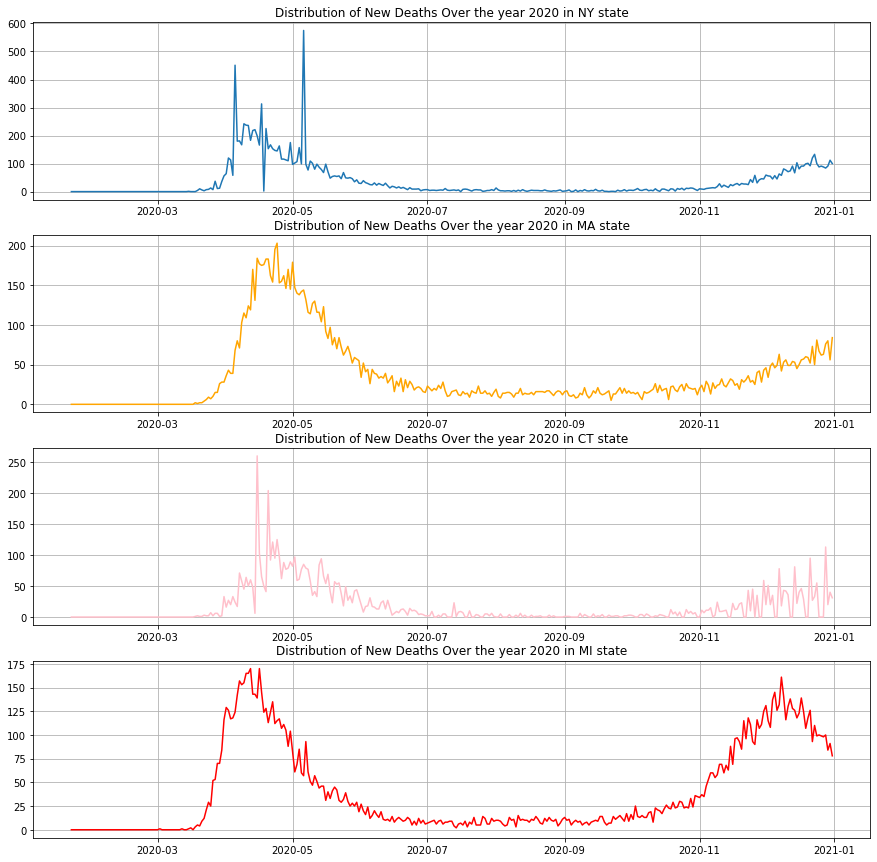

In [604]:
# Graph plot for the states and new deaths over the year 2020
f, axs = plt.subplots(4, 1, figsize=(15, 15))
# axs[0].subplot(2, 1, 1)
axs[0].grid()
axs[0].plot(df_total_NY["Date"], df_total_NY["new_death"].astype(int))
axs[0].title.set_text("Distribution of New Deaths Over the year 2020 in NY state")
# plt.subplot(2, 1, 2)
axs[1].grid()
axs[1].plot(df_total_MA["Date"], df_total_MA["new_death"].astype(int), color="orange")
axs[1].title.set_text("Distribution of New Deaths Over the year 2020 in MA state")
# plt.show()
axs[2].grid()
axs[2].plot(df_total_CT["Date"], df_total_CT["new_death"].astype(int), color="pink")
axs[2].title.set_text("Distribution of New Deaths Over the year 2020 in CT state")
# plt.show()
axs[3].grid()
axs[3].plot(df_total_MI["Date"], df_total_MI["new_death"].astype(int), color="red")
axs[3].title.set_text("Distribution of New Deaths Over the year 2020 in MI state")
# plt.show()

In [605]:
# Creating a subset dataframe based on above hypothesis
df["Date"] = pd.to_datetime(df["Date"])
df_fin = df
df_fin = df[(df["Date"].dt.month >=3) & (df["Date"].dt.month <=6) & (df["Date"].dt.year == 2020)]
df_total = df[(df["Date"].dt.month >=1) & (df["Date"].dt.month <=12) & (df["Date"].dt.year == 2020)]

In [567]:
# Merging the covid dataframe and AQI dataframe on Date and State Name
fin = pd.merge(aqi_fin, df_fin, on=("Date","State Name"), how='inner')

In [606]:
# Merging the covid dataframe and AQI dataframe on Date and State Name
fin_total = pd.merge(aqi_fin, df_total, on=("Date","State Name"), how='inner')

In [568]:
fin.head()

,State Name,Date,AQI,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,AK,2020-02-01,38.000000,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN
1,AK,2020-02-02,31.000000,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN
2,AK,2020-02-03,21.777778,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN
3,AK,2020-02-04,29.166667,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN
4,AK,2020-02-05,32.333333,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,NaN,NaN


In [569]:
len(fin)

7550

In [ ]:
# Outlier detection on merged dataframe
def outlier_detection(X, column_name):
    values = sorted(X[column_name])
    Q1 = values[int(np.ceil(len(values) / 4))]
    Q3 = values[int(np.ceil(3 * len(values) / 4))]
    iqr = float(Q3 - Q1)
    outliers = X.loc[(X[column_name] > (Q3 + (1.5 * iqr))) | (X[column_name] < (Q1 - (1.5 * iqr)))]
    return outliers.index

In [571]:
# Finding the outliers
total_outliers = []
column_names = ['new_death']
for c in column_names:
    outliers = outlier_detection(fin, c)
    total_outliers.extend(outliers)
total_outliers = set(total_outliers)

In [572]:
# Keeping desired indices
desired_index = [i for i in fin.index if i not in total_outliers]
len(desired_index)
fin_without_outliers = fin.loc[desired_index]

In [573]:
len(fin_without_outliers)

6575

In [574]:
# Pearson Correlation Test

def correlationCoeff(fin):
    num = np.sum((fin['new_death']-fin['new_death'].mean())*(fin['AQI']-fin['AQI'].mean()))
    den = np.sqrt(np.sum(pow(fin['new_death']-fin['new_death'].mean(),2))*np.sum(pow(fin['AQI']-fin['AQI'].mean(),2)))
    coeff = num/den
    
    return coeff

In [607]:
print("For the year 2020, correlation coeff between AQI and deaths due to covid is")
correlationCoeff(fin_total)

For the year 2020, correlation coeff between AQI and deaths due to covid is


0.07499495427412275

In [608]:
print("For the months of March to June in 2020, correlation coeff between AQI and deaths due to covid is")
correlationCoeff(fin_without_outliers)

For the months of March to June in 2020, correlation coeff between AQI and deaths due to covid is


0.24128956898554116

## Analysis

As mentioned above, our hypothesis is that AQI and number of deaths are positively correlated. And from the result we can observe that there exists a weak albeit positive correlation between between AQI and the number of deaths.
This could be because air pollution and the quality of the air could add on to the covid disease which maily impact the lungs of human system. 
Again as mentioned above, for the entire 2020 data we see that there is an extremely weak correlation, and for the months where covid deaths were actually high, the correlation between AQI and number of deaths seemed decently correlated in a positive manner.
